In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/Users/priyanka/Documents/IronHack/Lab Practics & submission/folder_data/amz_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [2]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories
#1.1Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
#1.2are there categories where being a best-seller is more prevalent?
crosstab_percent = pd.crosstab(df['category'], df['isBestSeller'], normalize='index') * 100
crosstab_percent.round(2)

#Categories where the percentage of True is much higher than others are the ones where being a best-seller is more prevalent.

isBestSeller,False,True
category,,
3D Printers,99.60,0.40
3D Printing & Scanning,99.95,0.05
Abrasive & Finishing Products,98.00,2.00
Action Cameras,99.94,0.06
Adapters,98.82,1.18
...,...,...
Wind Instruments,97.20,2.80
Window Treatments,97.91,2.09
Women,98.80,1.20


In [7]:
#2.1Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value
#Since p-value ≪ 0.05, we reject the null hypothesis. That means best-seller status is not independent of product category → i.e., product category and best-seller status are strongly associated.
#This tells you there’s a statistically significant relationship.

(np.float64(36540.20270061387), np.float64(0.0))

In [8]:
#2.2Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

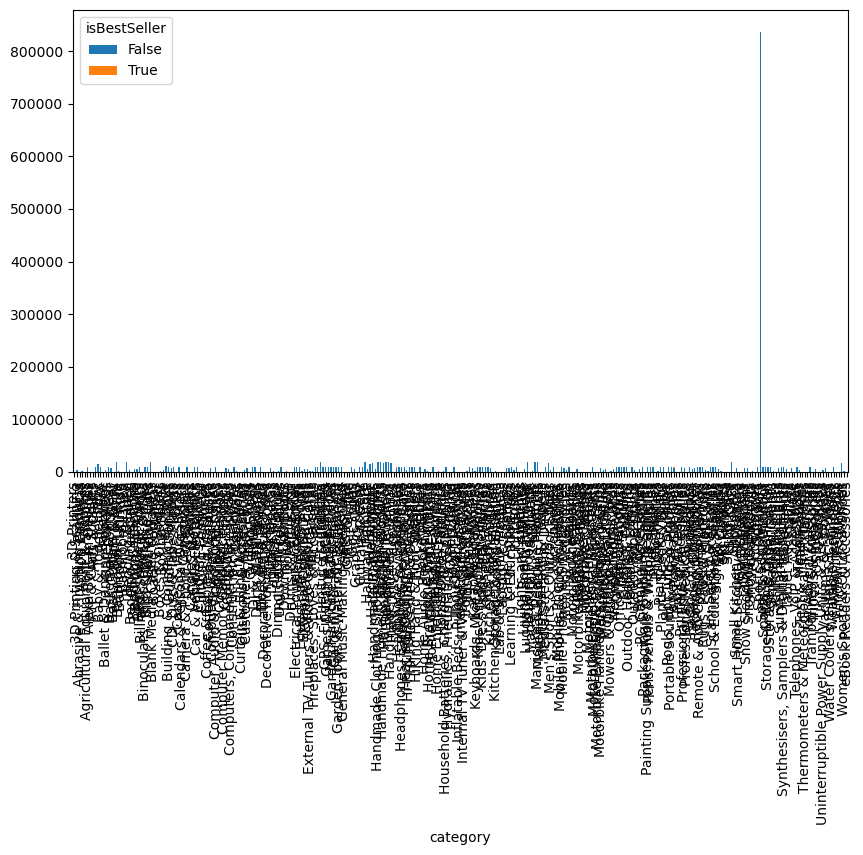

In [10]:
#2.3Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True,figsize=(10,6));
plt.show()

In [28]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])
def tukeys_test_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [29]:
df_no_outliers = tukeys_test_outliers(df, 'price')
print(f"After removing outliers: {df_no_outliers.shape}")

After removing outliers: (2115963, 9)


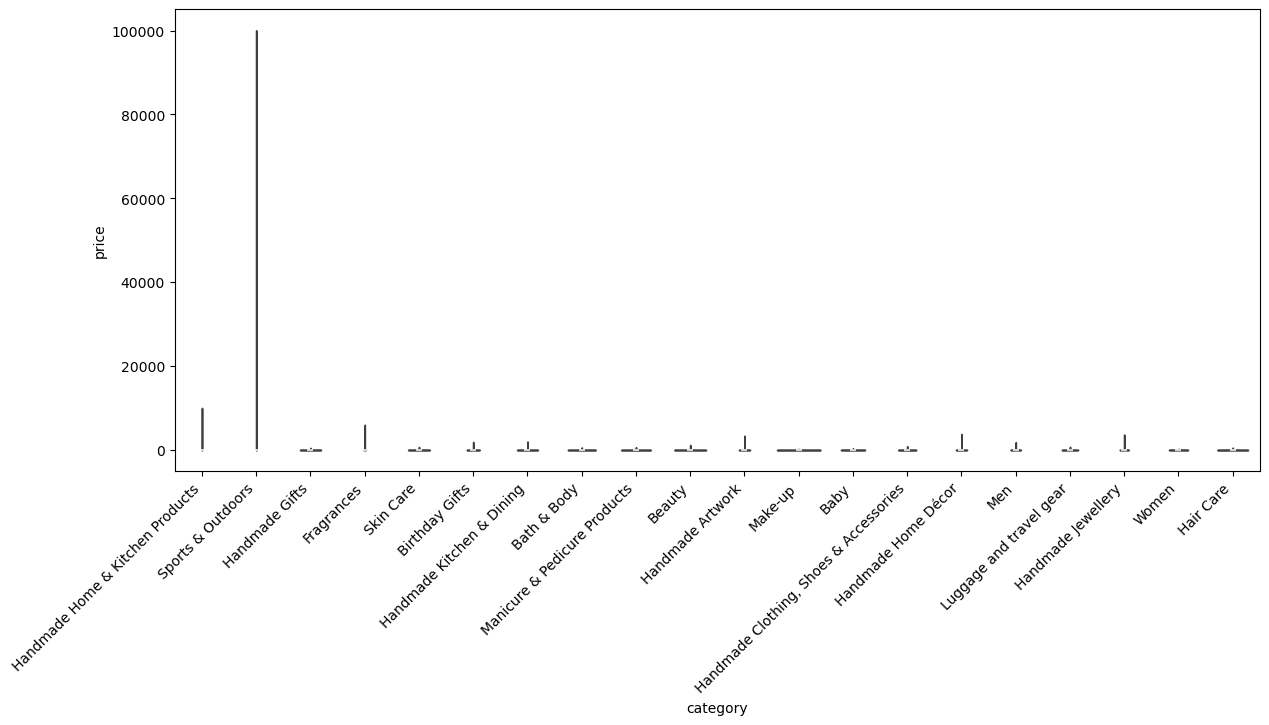

In [44]:
#1.1Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
top20_cat = df['category'].value_counts().head(20).index
df_top20 = df[df['category'].isin(top20_cat)]
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_top20, x='category', y='price');
plt.xticks(rotation=45, ha="right")
plt.show()

In [48]:
#1.2Which product category tends to have the highest median price? Don't filter here by top categories.
median = df.groupby('category')['price'].median().sort_values(ascending=False)
highest_cat = median.index[0]
highest_price = median.iloc[0]
print(highest_cat)
print(highest_price)

Laptops
1042.725


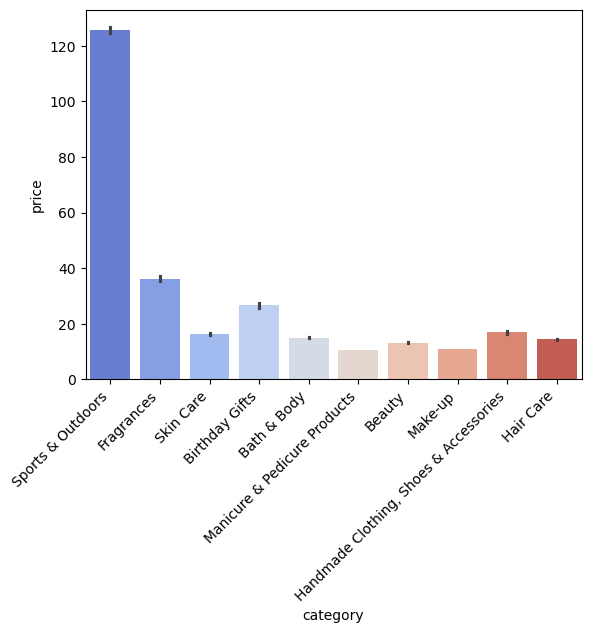

In [53]:
#2.2Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top10_cat = df['category'].value_counts().head(10).index
df_top10 = df[df['category'].isin(top10_cat)]
sns.barplot(data=df_top10, x='category', y='price', palette="coolwarm", hue = 'category', legend = False);
plt.xticks(rotation=45, ha="right")
plt.show()

In [54]:
#2.3Which product category commands the highest average price?
mean = df.groupby('category')['price'].mean().sort_values(ascending=False)
highest_cat = mean.index[0]
highest_price = mean.iloc[0]
print(highest_cat)
print(highest_price)

Laptops
1087.987826986755


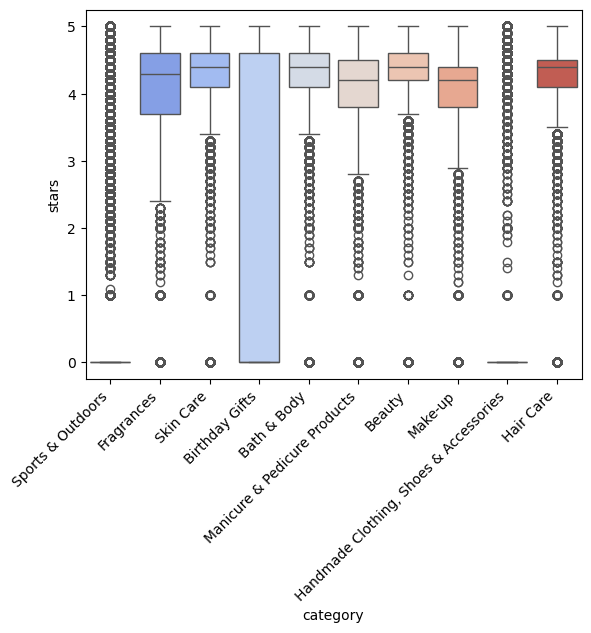

In [57]:
#3.1Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
top10_cat = df['category'].value_counts().head(10).index
df_top10 = df[df['category'].isin(top10_cat)]
sns.boxplot(data=df_top10, x='category', y='stars', palette="coolwarm", hue='category', legend=False);
plt.xticks(rotation=45, ha="right")
plt.show()

In [58]:
#3.2Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
median = df.groupby('category')['stars'].median().sort_values(ascending=False)
highest_cat = median.index[0]
highest_rating = median.iloc[0]
print(highest_cat)
print(highest_rating)

Computer Memory
4.7


In [59]:
#3: Investigating the Interplay Between Product Prices and Ratings
#1.1Calculate the correlation coefficient between price and stars
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.1249067326214854)

In [60]:
correlation = df['price'].corr(df['stars'], method='spearman')
correlation

np.float64(-0.13316425462433998)

In [ ]:
#1.2 negative corelation means- as price increases, ratings tend to decrease

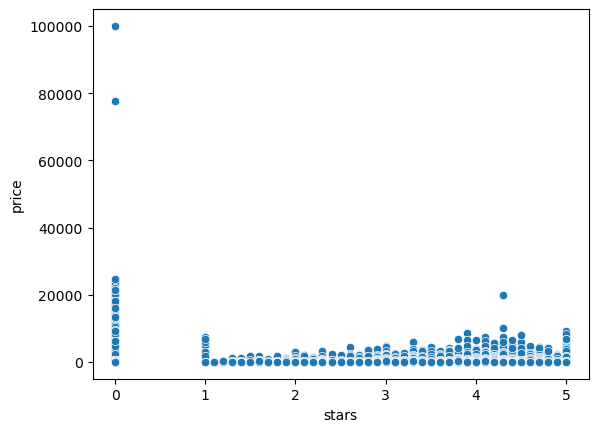

In [61]:
#2.1Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price');
plt.show()

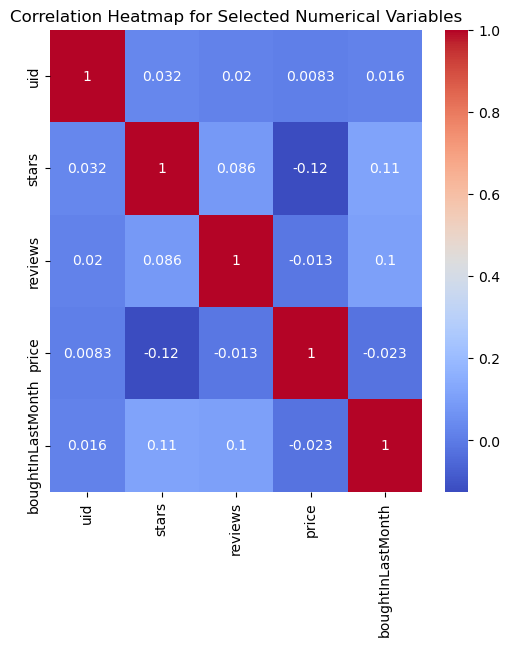

In [66]:
#2.2Use a correlation heatmap to visualize correlations between all numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

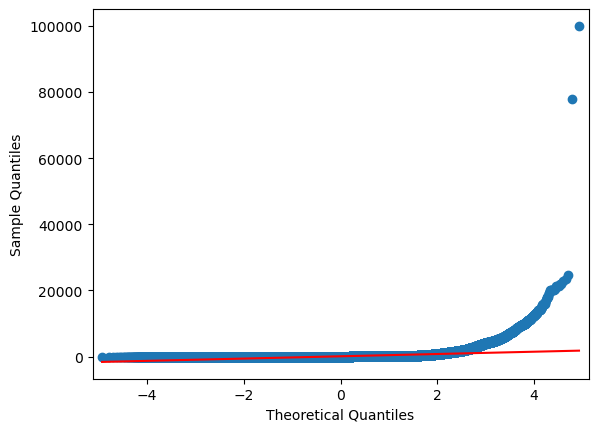

In [68]:
#2.3Examine if product prices typically follow a normal distribution using a QQ plot.-- Upper tail
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');
plt.show()